In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def JudgeWord(flag):
    if flag == "a":
        return "形容词"
    elif flag == "ad":
        return "副形词"
    elif flag == "an":
        return "名形词"
    elif flag == "b":
        return "区别词"
    elif flag == "c":
        return "连词"
    elif flag == "dg":
        return "副语素"
    elif flag == "d":
        return "副词"
    elif flag == "e":
        return "叹词"
    elif flag == "f":
        return "方位词"
    elif flag == "g":
        return "语素"
    elif flag == "h":
        return "前接成分"
    elif flag == "i":
        return "成语"
    elif flag == "j":
        return "简称略语"
    elif flag == "k":
        return "后接成分"
    elif flag == "l":
        return "习用语"
    elif flag == "m":
        return "数词"
    elif flag == "Ng":
        return "名语素"
    elif flag == "n":
        return "名词"
    elif flag == "nr":
        return "人名"
    elif flag == "ns":
        return "地名"
    elif flag == "nt":
        return "机构团体"
    elif flag == "nz":
        return "其他专名"
    elif flag == "o":
        return "拟声词"
    elif flag == "p":
        return "介词"
    elif flag == "q":
        return "量词"
    elif flag == "r":
        return "代词"
    elif flag == "s":
        return "处所词"
    elif flag == "tg":
        return "时语素"
    elif flag == "t":
        return "时间词"
    elif flag == "u":
        return "助词"
    elif flag == "vg":
        return "动语素"
    elif flag == "v":
        return "动词"
    elif flag == "vd":
        return "副动词"
    elif flag == "vn":
        return "名动词"
    elif flag == "w":
        return "标点符号"
    elif flag == "x":
        return "非语素字"
    elif flag == "y":
        return "语气词"
    elif flag == "z":
        return "状态词"
    elif flag == "un":
        return "未知词"
    else:
        return None

def remove_stopwords(text):
    with open('stopwords/cn_stopwords.txt', 'r', encoding='utf-8') as f: 
        for i in f:
            text = text.replace(i.strip(), '')
    return text

In [2]:
df = pd.read_csv('comment_con 好评.csv')

text = []
for i in df['content']:
    text.append(remove_stopwords(i.replace('\n', '').replace('*', '').replace(' ','')))

import jieba.analyse as analyse
import jieba.posseg as peg
from collections import Counter

words = []
word_counter = Counter()
flag_counter = Counter()
noun_counter = Counter()
for i in text:
    word = []
    for w, f in peg.cut(i):
        word_counter[w] += 1
        flag_counter[JudgeWord(f)] += 1
        word.append(w)
        if f == 'n':
            noun_counter[w] += 1
    words.append(word)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hejin\AppData\Local\Temp\jieba.cache
Loading model cost 0.484 seconds.
Prefix dict has been built successfully.


In [3]:
flag = []
flag_count = []
for k,v in dict(flag_counter).items():
    flag.append(k)
    flag_count.append(v)
flag_df = pd.DataFrame(np.column_stack([flag, flag_count]), columns = ['词性','数量'])
flag_df = flag_df[flag_df['词性'] != 'None']
flag_df['数量'] = flag_df['数量'].astype(int)
flag_df = flag_df.sort_values(by='数量', ascending=False)
flag_df

,词性,数量
4,名词,9484
0,动词,7346
12,形容词,2265
3,副词,1833
5,人名,1091
11,名动词,796
9,数词,521
1,地名,389
7,量词,386
13,None,335


In [4]:
word = []
word_count = []
for k,v in dict(word_counter).items():
    word.append(k)
    word_count.append(v)
word_df = pd.DataFrame(np.column_stack([word, word_count]), columns = ['词','数量'])
word_df['数量'] = word_df['数量'].astype(int)
word_df = word_df.sort_values(by='数量', ascending=False)
word_df.reset_index(drop=True, inplace=True)
top_20 = word_df[:20]
top_20

,词,数量
0,安装,1128
1,非常,893
2,师傅,668
3,快,606
4,空调,468
5,效果,450
6,满意,419
7,服务,387
8,送货,374
9,错,357


In [5]:
# 共词矩阵
top_20_words = top_20['词']
coemerge = pd.DataFrame(top_20_words)
for col in range(20):
    coli = []
    for row in range(20):
        count = 0
        for sentence in words:
            if top_20_words[row] in sentence and top_20_words[col] in sentence and row != col:
                count += 1
        coli.append(count)
    coemerge[f'col_{col}'] = coli
coemerge.set_index(coemerge.columns[0], inplace=True)
coemerge.columns = top_20_words
coemerge

词,安装,非常,师傅,快,空调,效果,满意,服务,送货,错,外观,质量,物流,买,制冷,喜欢,速度,美,品牌,静音
词,,,,,,,,,,,,,,,,,,,,
安装,0,325,497,324,261,223,197,231,252,183,191,141,152,151,155,108,144,107,106,98
非常,325,0,253,236,120,134,208,179,168,159,157,145,144,121,90,129,113,57,106,58
师傅,497,253,0,236,193,152,156,160,189,139,140,119,126,110,101,90,107,75,82,66
快,324,236,236,0,135,137,155,157,179,134,148,114,170,105,123,106,163,62,84,61
空调,261,120,193,135,0,124,48,62,84,66,76,51,43,62,124,13,50,109,37,60
效果,223,134,152,137,124,0,69,75,110,108,148,41,59,52,174,38,57,50,46,117
满意,197,208,156,155,48,69,0,127,106,114,103,111,103,88,31,104,75,28,79,23
服务,231,179,160,157,62,75,127,0,108,95,87,93,95,83,43,86,71,31,61,24
送货,252,168,189,179,84,110,106,108,0,95,122,79,73,63,62,66,77,41,62,71


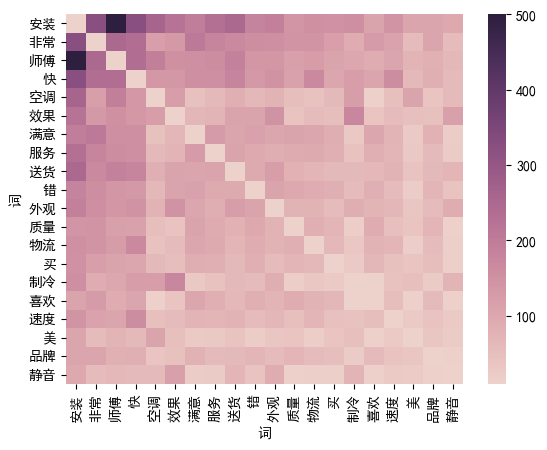

In [6]:
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

sns.heatmap(coemerge,vmin=10,vmax=500,cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [7]:
noun = []
noun_count = []
for k,v in dict(noun_counter).items():
    noun.append(k)
    noun_count.append(v)
noun_df = pd.DataFrame(np.column_stack([noun, noun_count]), columns = ['名词','数量'])
noun_df['数量'] = noun_df['数量'].astype(int)
noun_df = noun_df.sort_values(by='数量', ascending=False)
noun_df

,名词,数量
3,空调,468
12,效果,450
29,外观,325
63,质量,278
75,物流,264
...,...,...
761,网红,1
762,评月,1
763,心贴心,1
288,面积,1


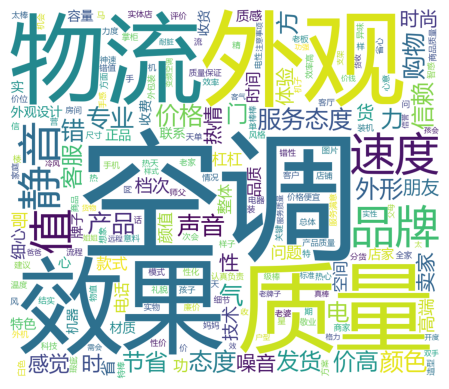

In [8]:
from wordcloud import WordCloud

nouns = ' '.join(noun_df['名词'])
wc = WordCloud(background_color='white',font_path = 'msyh.ttc', width=1000, height=860, margin=2).generate(nouns)
plt.imshow(wc)
plt.axis('off')
plt.show()